# Gray-Scott PDE equations
This notebook shows how to use the function in this git repository to numerically solve the PDE, generate data, run tests and perform inference. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('python_files/')
from Pde_solver import Solver
from Inference import Inference

## Solve PDE and generate data
The following lines call the `Solver` class to solve the Gray-Scott equations. 

#### Spatial grid:
The solver uses a square grid with `n_grid` x `n_grid` points, and periodic boundary conditions in both x and y directions. For generating data we recommend `n_grid = 256`, and for inference `n_grid=32`. 

#### Time points:
You can set the number of time points to use in `Solver`. Additionally, the `solve()` function can be called with `til_convergence=True` to abort solving once the stopping criterion has been reached (if the summed relative change < `rel_tol`).

In [2]:
## Initiate PDE solver class 
solv = Solver(n_save_frames=4000, n_time_points=4000, model='gray-scott', n_grid=32)

In [5]:
## Set F & k parameters and solve
## spots: F=0.035, k=0.065
## maze-like: F=0.035, k=0.06
F = 0.035
k = 0.06

tmp = solv.solve(parameters=[F, k], verbose=True, til_convergence=False)  # parameters = [F, k]

  8%|▊         | 306/4000 [00:00<00:01, 3056.49it/s]

Solving gray-scott model in 4000 time steps.




100%|██████████| 4000/4000 [00:01<00:00, 3153.68it/s]


### Plot results:
You can either plots results in custom format, by calling `Solver.u_mat` for the latest result or `Solver.save_u_mat[time_frame, :, :]` for intermediate results at `time_frame` (taken at regular intervals, as defined by `n_save_frames`). Similarly one can plot the `v` matrices. 
Alternatively, you can use the plotting functions of `Solver`: 
   - `Solver.plot2d()` to plot the the `u` and `v` matrices. 
   - `Solver.animation()` to create a gif animation of all saved intermediate results. This is saved to disk (in the current directory).

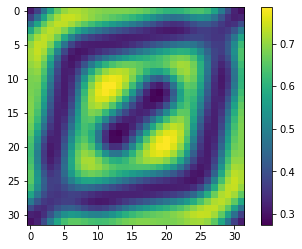

In [6]:
## Plot result
plt.imshow(solv.u_mat[:, :])
plt.colorbar()

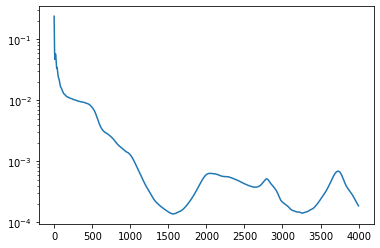

In [5]:
plt.plot(solv.convergence)
plt.yscale('log')

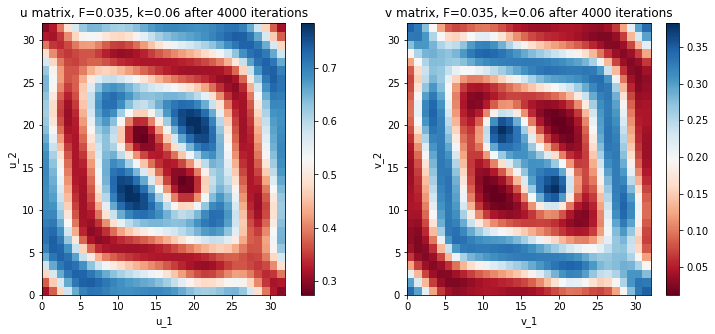

In [6]:
## Or use plotting function from class
solv.plot2d()

In [ ]:
## Save animation to disk
plt.rcParams['figure.figsize'] = (6, 6)
solv.animation()

In [29]:
len(solv.save_times)
solv.save_times
solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y).shape

(20, 65536)

## Inference
Perform inference using `pints`.


In [24]:
solv.save_times.shape


(380,)

In [7]:
## Initiate inference class:
inference = Inference(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))
# problem = pints.MultiOutputProblem(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))

In [8]:
inference.optimise()

Minimising error measure
Using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      977350.3   0:09.1


python_files/Pde_solver.py:198: RuntimeWarning: invalid value encountered in double_scalars
  + (np.sum(np.abs(self.v_mat - old_v)) / np.sum(np.abs(old_v))))


1     12     977350.3   0:17.4
2     18     977350.3   0:25.4
3     24     977350.3   0:33.7
20    126    977350.3   3:01.0

----------------------------------------
Unexpected termination.
Current best score: 977350.3002742336
Current best position:
 2.13285346252927444e-01
 1.26575948337970923e-01
----------------------------------------


KeyboardInterrupt: 